# Save and Restore

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import tensorflow as tf

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = (x_train / 255).reshape((60000, 28, 28, 1))
x_test = (x_test / 255).reshape((10000, 28, 28, 1))

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                     input_shape=x_train.shape[1:]),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax'),
])

In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.2339 - accuracy: 0.9298 - val_loss: 0.0547 - val_accuracy: 0.9822
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0829 - accuracy: 0.9753 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0318 - val_accuracy: 0.9894
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0255 - val_accuracy: 0.9923
Epoch 7/10
60000/60000 [==============================

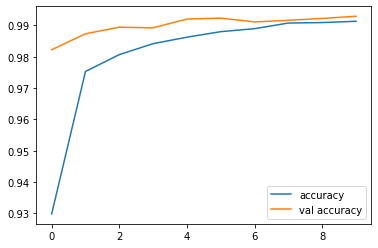

In [10]:
plot(history.history['accuracy'], label='accuracy')
plot(history.history['val_accuracy'], label='val accuracy')
legend()

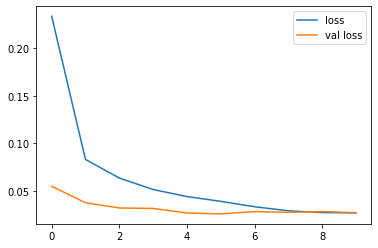

In [11]:
plot(history.history['loss'], label='loss')
plot(history.history['val_loss'], label='val loss')
legend()

In [0]:
model.save_weights('model.h5')

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                     input_shape=x_train.shape[1:]),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax'),
])

In [0]:
model.load_weights('model.h5')